In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import copy

# READ DATA

In [4]:
df_train = pd.read_csv('salju_train.csv')
df_train.head()

id     Tanggal KodeLokasi  SuhuMin  SuhuMax  Hujan  Penguapan  \
0   1  01/06/2014         C4     10.4     15.5    4.8        NaN   
1   2  15/07/2014        C10      9.0     17.0    8.0        2.6   
2   3  16/02/2011        C46     18.2     32.0    0.0        NaN   
3   4  08/08/2012        C36      7.3     24.5    0.0        8.4   
4   5  29/10/2016         C7      5.9     20.3    0.0        3.6   

   SinarMatahari ArahAnginTerkencang  KecepatanAnginTerkencang  ...  \
0            NaN                 WSW                      24.0  ...   
1            7.4                 NaN                       NaN  ...   
2            NaN                 ESE                      44.0  ...   
3           10.4                 SSW                      54.0  ...   
4           12.6                   N                      37.0  ...   

  Kelembaban9am Kelembaban3pm  Tekanan9am  Tekanan3pm  Awan9am  Awan3pm  \
0          78.0          76.0      1020.1      1018.5      NaN      NaN   
1          80.0          61.0      1015.2      1014.6      7.0      5.0   
2          62.0          42.0         NaN         NaN      NaN      NaN   
3          25.0          17.0      1019.2      1016.9      1.0      7.0   
4          55.0          48.0      1019.7      1014.7      2.0      6.0   

   Suhu9am  Suhu3pm  BersaljuHariIni  BersaljuBesok  
0     13.1     15.0               Ya          Tidak  
1     11.9     15.5               Ya             Ya  
2     23.8     29.6            Tidak          Tidak  
3     15.3     23.2            Tidak          Tidak  
4     12.4     18.1            Tidak          Tidak  

[5 rows x 24 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [6]:
df_train.shape

(109095, 24)

In [7]:
df_train.describe()

id        SuhuMin        SuhuMax          Hujan  \
count  109095.000000  107973.000000  108166.000000  106664.000000   
mean    54548.000000      12.196183      23.214819       2.385005   
std     31493.158146       6.389419       7.106596       8.588155   
min         1.000000      -8.500000      -4.800000       0.000000   
25%     27274.500000       7.600000      17.900000       0.000000   
50%     54548.000000      12.000000      22.600000       0.000000   
75%     81821.500000      16.800000      28.200000       0.800000   
max    109095.000000      33.900000      47.300000     371.000000   

          Penguapan  SinarMatahari  KecepatanAnginTerkencang  \
count  62071.000000   56716.000000             101399.000000   
mean       5.462440       7.599527                 40.032002   
std        4.201638       3.789042                 13.617554   
min        0.000000       0.000000                  7.000000   
25%        2.600000       4.800000                 31.000000   
50%        4.800000       8.400000                 39.000000   
75%        7.400000      10.600000                 48.000000   
max      145.000000      14.300000                135.000000   

       KecepatanAngin9am  KecepatanAngin3pm  Kelembaban9am  Kelembaban3pm  \
count      107742.000000      106792.000000  107093.000000  105721.000000   
mean           14.052115          18.677579      68.895577      51.567626   
std             8.926092           8.830199      18.995528      20.791573   
min             0.000000           0.000000       0.000000       0.000000   
25%             7.000000          13.000000      57.000000      37.000000   
50%            13.000000          19.000000      70.000000      52.000000   
75%            19.000000          24.000000      83.000000      66.000000   
max           130.000000          87.000000     100.000000     100.000000   

         Tekanan9am    Tekanan3pm       Awan9am       Awan3pm        Suhu9am  \
count  97768.000000  97787.000000  67251.000000  64624.000000  107755.000000   
mean    1017.647080   1015.253117      4.450893      4.516140      16.991391   
std        7.117338      7.047875      2.884566      2.718738       6.477602   
min      980.500000    977.100000      0.000000      0.000000      -7.200000   
25%     1012.900000   1010.400000      1.000000      2.000000      12.300000   
50%     1017.600000   1015.200000      5.000000      5.000000      16.700000   
75%     1022.400000   1020.000000      7.000000      7.000000      21.600000   
max     1041.000000   1039.600000      9.000000      9.000000      40.200000   

             Suhu3pm  
count  106397.000000  
mean       21.672771  
std         6.922833  
min        -5.400000  
25%        16.600000  
50%        21.100000  
75%        26.400000  
max        46.700000

In [8]:
df_test = pd.read_csv('salju_test.csv')
df_test.head()

Tanggal KodeLokasi  SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari  \
0  04/11/2010        C39     11.0     27.5    0.0        NaN            6.4   
1  26/03/2015        C35     10.0     19.9    0.2        NaN            NaN   
2  22/03/2016        C18      9.2     27.2    0.0        5.2           10.4   
3  09/12/2011        C31     17.7     27.0    0.0        4.6            6.7   
4  20/05/2017        C14      2.3      7.9   88.0        NaN            NaN   

  ArahAnginTerkencang  KecepatanAnginTerkencang ArahAngin9am  ...  \
0                 WSW                      46.0            W  ...   
1                 WNW                      56.0            W  ...   
2                 SSW                      33.0           NE  ...   
3                  SW                      35.0            E  ...   
4                  NW                      46.0            W  ...   

  Kelembaban9am  Kelembaban3pm  Tekanan9am  Tekanan3pm  Awan9am  Awan3pm  \
0          39.0           56.0      1013.0      1012.4      4.0      7.0   
1          76.0           32.0      1017.0      1015.2      8.0      1.0   
2          89.0           27.0      1018.6      1015.7      0.0      1.0   
3          55.0           41.0      1010.2      1008.6      7.0      6.0   
4          98.0           95.0         NaN         NaN      NaN      NaN   

   Suhu9am  Suhu3pm  BersaljuHariIni  BersaljuBesok  
0     25.7     23.6               No             No  
1     10.7     18.9               No            Yes  
2     13.9     26.3               No             No  
3     22.3     26.4               No             No  
4      4.4      6.0              Yes             No  

[5 rows x 23 columns]

In [9]:
df_test.shape

(18182, 23)

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  object 
 2   SuhuMin                   18017 non-null  float64
 3   SuhuMax                   18017 non-null  float64
 4   Hujan                     17795 non-null  float64
 5   Penguapan                 10326 non-null  float64
 6   SinarMatahari             9464 non-null   float64
 7   ArahAnginTerkencang       16901 non-null  object 
 8   KecepatanAnginTerkencang  16908 non-null  float64
 9   ArahAngin9am              16874 non-null  object 
 10  ArahAngin3pm              17686 non-null  object 
 11  KecepatanAngin9am         17984 non-null  float64
 12  KecepatanAngin3pm         17828 non-null  float64
 13  Kelembaban9am             17852 non-null  float64
 14  Kelemb

In [11]:
df_test.describe()

SuhuMin       SuhuMax         Hujan     Penguapan  SinarMatahari  \
count  18017.000000  18017.000000  17795.000000  10326.000000    9464.000000   
mean      12.233158     23.295604      2.333560      5.509646       7.630135   
std        6.433053      7.156981      8.320407      4.159158       3.796355   
min       -7.600000     -2.500000      0.000000      0.000000       0.000000   
25%        7.700000     18.000000      0.000000      2.600000       4.900000   
50%       12.000000     22.700000      0.000000      4.800000       8.400000   
75%       16.900000     28.300000      0.600000      7.400000      10.700000   
max       31.400000     48.100000    247.200000     68.800000      14.500000   

       KecepatanAnginTerkencang  KecepatanAngin9am  KecepatanAngin3pm  \
count              16908.000000       17984.000000       17828.000000   
mean                  39.974095          13.971864          18.585540   
std                   13.491682           8.828422           8.748586   
min                    6.000000           0.000000           0.000000   
25%                   31.000000           7.000000          13.000000   
50%                   39.000000          13.000000          17.000000   
75%                   48.000000          19.000000          24.000000   
max                  122.000000          83.000000          83.000000   

       Kelembaban9am  Kelembaban3pm   Tekanan9am    Tekanan3pm       Awan9am  \
count   17852.000000   17634.000000  16317.00000  16329.000000  11140.000000   
mean       68.791676      51.438811   1017.56166   1015.181064      4.449820   
std        19.158606      20.799233      7.14728      7.072656      2.890697   
min         2.000000       1.000000    982.30000    984.500000      0.000000   
25%        57.000000      36.000000   1012.90000   1010.400000      1.000000   
50%        70.000000      52.000000   1017.60000   1015.200000      5.000000   
75%        83.000000      66.000000   1022.30000   1019.900000      7.000000   
max       100.000000     100.000000   1040.60000   1038.400000      8.000000   

            Awan3pm       Suhu9am       Suhu3pm  
count  10726.000000  17963.000000  17740.000000  
mean       4.498322     17.048945     21.774408  
std        2.725233      6.524556      6.978095  
min        0.000000     -5.200000     -3.700000  
25%        2.000000     12.300000     16.700000  
50%        5.000000     16.800000     21.200000  
75%        7.000000     21.600000     26.600000  
max        8.000000     37.700000     46.100000

# EXPLORATION DATA

In [12]:
# HAPUS KOLOM YANG TIDAK DIPERLUKAN (id, kodelokasi, tanggal)

cols = [0,1,2]
df_train.drop(df_train.columns[cols], axis=1, inplace=True)
df_train

SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari ArahAnginTerkencang  \
0          10.4     15.5    4.8        NaN            NaN                 WSW   
1           9.0     17.0    8.0        2.6            7.4                 NaN   
2          18.2     32.0    0.0        NaN            NaN                 ESE   
3           7.3     24.5    0.0        8.4           10.4                 SSW   
4           5.9     20.3    0.0        3.6           12.6                   N   
...         ...      ...    ...        ...            ...                 ...   
109090     20.1     23.7    0.0        7.2            8.9                 ESE   
109091     15.7     25.2    0.0        NaN            NaN                 SSE   
109092      7.5     20.4    1.6        NaN            NaN                  NW   
109093     10.8     29.8    0.0        7.8           11.2                   E   
109094     12.3     27.4    9.0        NaN            NaN                 WNW   

        KecepatanAnginTerkencang ArahAngin9am ArahAngin3pm  KecepatanAngin9am  \
0                           24.0          NaN          WSW                0.0   
1                            NaN           SW          WNW               13.0   
2                           44.0           SE           SE               15.0   
3                           54.0            N           SW               13.0   
4                           37.0          NNW          ESE               22.0   
...                          ...          ...          ...                ...   
109090                      43.0           SE          ESE               24.0   
109091                      37.0          SSE            E               28.0   
109092                      33.0            N           NW                4.0   
109093                      48.0          ESE           SE               13.0   
109094                      35.0          NNE           NE               11.0   

        ...  Kelembaban9am  Kelembaban3pm  Tekanan9am  Tekanan3pm  Awan9am  \
0       ...           78.0           76.0      1020.1      1018.5      NaN   
1       ...           80.0           61.0      1015.2      1014.6      7.0   
2       ...           62.0           42.0         NaN         NaN      NaN   
3       ...           25.0           17.0      1019.2      1016.9      1.0   
4       ...           55.0           48.0      1019.7      1014.7      2.0   
...     ...            ...            ...         ...         ...      ...   
109090  ...           74.0           70.0      1019.3      1017.6      4.0   
109091  ...           52.0           52.0      1018.4      1016.2      NaN   
109092  ...           92.0           51.0      1014.5      1010.6      NaN   
109093  ...           35.0           18.0      1020.0      1015.8      0.0   
109094  ...           71.0           76.0      1010.4      1005.4      NaN   

        Awan3pm  Suhu9am  Suhu3pm  BersaljuHariIni BersaljuBesok  
0           NaN     13.1     15.0               Ya         Tidak  
1           5.0     11.9     15.5               Ya            Ya  
2           NaN     23.8     29.6            Tidak         Tidak  
3           7.0     15.3     23.2            Tidak         Tidak  
4           6.0     12.4     18.1            Tidak         Tidak  
...         ...      ...      ...              ...           ...  
109090      6.0     22.0     22.1            Tidak            Ya  
109091      NaN     23.8     24.4            Tidak            Ya  
109092      NaN     12.6     19.8               Ya         Tidak  
109093      1.0     21.7     29.2            Tidak         Tidak  
109094      NaN     20.4     23.3               Ya         Tidak  

[109095 rows x 21 columns]

In [13]:
cols = [0,1]
df_test.drop(df_test.columns[cols], axis=1, inplace=True)
df_test

SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari ArahAnginTerkencang  \
0         11.0     27.5    0.0        NaN            6.4                 WSW   
1         10.0     19.9    0.2        NaN            NaN                 WNW   
2          9.2     27.2    0.0        5.2           10.4                 SSW   
3         17.7     27.0    0.0        4.6            6.7                  SW   
4          2.3      7.9   88.0        NaN            NaN                  NW   
...        ...      ...    ...        ...            ...                 ...   
18177      7.8     25.8    0.0        8.0           13.2                  NE   
18178     12.4     26.6    0.0        8.0           11.6                  NW   
18179      6.7     22.9    0.0        NaN            NaN                 NaN   
18180     12.5     26.7    0.0        9.0           10.8                  NE   
18181     12.3     15.9    8.2        NaN            NaN                  SE   

       KecepatanAnginTerkencang ArahAngin9am ArahAngin3pm  KecepatanAngin9am  \
0                          46.0            W            W               20.0   
1                          56.0            W           NW               24.0   
2                          33.0           NE            N               13.0   
3                          35.0            E          SSE               20.0   
4                          46.0            W          WNW               13.0   
...                         ...          ...          ...                ...   
18177                      31.0          ENE           NW               22.0   
18178                      37.0           NE          WNW               17.0   
18179                       NaN          NaN           NW                0.0   
18180                      35.0           SW          ENE                2.0   
18181                      31.0           SW          SSE               15.0   

       ...  Kelembaban9am  Kelembaban3pm  Tekanan9am  Tekanan3pm  Awan9am  \
0      ...           39.0           56.0      1013.0      1012.4      4.0   
1      ...           76.0           32.0      1017.0      1015.2      8.0   
2      ...           89.0           27.0      1018.6      1015.7      0.0   
3      ...           55.0           41.0      1010.2      1008.6      7.0   
4      ...           98.0           95.0         NaN         NaN      NaN   
...    ...            ...            ...         ...         ...      ...   
18177  ...           59.0           21.0      1017.1      1014.2      6.0   
18178  ...           59.0           25.0      1022.2      1018.7      1.0   
18179  ...           84.0           35.0         NaN         NaN      1.0   
18180  ...           56.0           45.0      1021.9      1018.1      5.0   
18181  ...           87.0           74.0         NaN         NaN      NaN   

       Awan3pm  Suhu9am  Suhu3pm  BersaljuHariIni BersaljuBesok  
0          7.0     25.7     23.6               No            No  
1          1.0     10.7     18.9               No           Yes  
2          1.0     13.9     26.3               No            No  
3          6.0     22.3     26.4               No            No  
4          NaN      4.4      6.0              Yes            No  
...        ...      ...      ...              ...           ...  
18177      1.0     16.8     24.0               No            No  
18178      1.0     17.1     25.7               No            No  
18179      2.0     11.8     22.0               No            No  
18180      5.0     22.9     25.4               No            No  
18181      NaN     13.8     15.4              Yes           Yes  

[18182 rows x 21 columns]

In [14]:
df_train._get_numeric_data().columns

Index(['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari',
       'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm',
       'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am',
       'Awan3pm', 'Suhu9am', 'Suhu3pm'],
      dtype='object')

In [15]:
df_test._get_numeric_data().columns

Index(['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari',
       'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm',
       'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am',
       'Awan3pm', 'Suhu9am', 'Suhu3pm'],
      dtype='object')

In [16]:
train = df_train.copy()
test = df_test.copy()

In [17]:
train

SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari ArahAnginTerkencang  \
0          10.4     15.5    4.8        NaN            NaN                 WSW   
1           9.0     17.0    8.0        2.6            7.4                 NaN   
2          18.2     32.0    0.0        NaN            NaN                 ESE   
3           7.3     24.5    0.0        8.4           10.4                 SSW   
4           5.9     20.3    0.0        3.6           12.6                   N   
...         ...      ...    ...        ...            ...                 ...   
109090     20.1     23.7    0.0        7.2            8.9                 ESE   
109091     15.7     25.2    0.0        NaN            NaN                 SSE   
109092      7.5     20.4    1.6        NaN            NaN                  NW   
109093     10.8     29.8    0.0        7.8           11.2                   E   
109094     12.3     27.4    9.0        NaN            NaN                 WNW   

        KecepatanAnginTerkencang ArahAngin9am ArahAngin3pm  KecepatanAngin9am  \
0                           24.0          NaN          WSW                0.0   
1                            NaN           SW          WNW               13.0   
2                           44.0           SE           SE               15.0   
3                           54.0            N           SW               13.0   
4                           37.0          NNW          ESE               22.0   
...                          ...          ...          ...                ...   
109090                      43.0           SE          ESE               24.0   
109091                      37.0          SSE            E               28.0   
109092                      33.0            N           NW                4.0   
109093                      48.0          ESE           SE               13.0   
109094                      35.0          NNE           NE               11.0   

        ...  Kelembaban9am  Kelembaban3pm  Tekanan9am  Tekanan3pm  Awan9am  \
0       ...           78.0           76.0      1020.1      1018.5      NaN   
1       ...           80.0           61.0      1015.2      1014.6      7.0   
2       ...           62.0           42.0         NaN         NaN      NaN   
3       ...           25.0           17.0      1019.2      1016.9      1.0   
4       ...           55.0           48.0      1019.7      1014.7      2.0   
...     ...            ...            ...         ...         ...      ...   
109090  ...           74.0           70.0      1019.3      1017.6      4.0   
109091  ...           52.0           52.0      1018.4      1016.2      NaN   
109092  ...           92.0           51.0      1014.5      1010.6      NaN   
109093  ...           35.0           18.0      1020.0      1015.8      0.0   
109094  ...           71.0           76.0      1010.4      1005.4      NaN   

        Awan3pm  Suhu9am  Suhu3pm  BersaljuHariIni BersaljuBesok  
0           NaN     13.1     15.0               Ya         Tidak  
1           5.0     11.9     15.5               Ya            Ya  
2           NaN     23.8     29.6            Tidak         Tidak  
3           7.0     15.3     23.2            Tidak         Tidak  
4           6.0     12.4     18.1            Tidak         Tidak  
...         ...      ...      ...              ...           ...  
109090      6.0     22.0     22.1            Tidak            Ya  
109091      NaN     23.8     24.4            Tidak            Ya  
109092      NaN     12.6     19.8               Ya         Tidak  
109093      1.0     21.7     29.2            Tidak         Tidak  
109094      NaN     20.4     23.3               Ya         Tidak  

[109095 rows x 21 columns]

In [18]:
test

SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari ArahAnginTerkencang  \
0         11.0     27.5    0.0        NaN            6.4                 WSW   
1         10.0     19.9    0.2        NaN            NaN                 WNW   
2          9.2     27.2    0.0        5.2           10.4                 SSW   
3         17.7     27.0    0.0        4.6            6.7                  SW   
4          2.3      7.9   88.0        NaN            NaN                  NW   
...        ...      ...    ...        ...            ...                 ...   
18177      7.8     25.8    0.0        8.0           13.2                  NE   
18178     12.4     26.6    0.0        8.0           11.6                  NW   
18179      6.7     22.9    0.0        NaN            NaN                 NaN   
18180     12.5     26.7    0.0        9.0           10.8                  NE   
18181     12.3     15.9    8.2        NaN            NaN                  SE   

       KecepatanAnginTerkencang ArahAngin9am ArahAngin3pm  KecepatanAngin9am  \
0                          46.0            W            W               20.0   
1                          56.0            W           NW               24.0   
2                          33.0           NE            N               13.0   
3                          35.0            E          SSE               20.0   
4                          46.0            W          WNW               13.0   
...                         ...          ...          ...                ...   
18177                      31.0          ENE           NW               22.0   
18178                      37.0           NE          WNW               17.0   
18179                       NaN          NaN           NW                0.0   
18180                      35.0           SW          ENE                2.0   
18181                      31.0           SW          SSE               15.0   

       ...  Kelembaban9am  Kelembaban3pm  Tekanan9am  Tekanan3pm  Awan9am  \
0      ...           39.0           56.0      1013.0      1012.4      4.0   
1      ...           76.0           32.0      1017.0      1015.2      8.0   
2      ...           89.0           27.0      1018.6      1015.7      0.0   
3      ...           55.0           41.0      1010.2      1008.6      7.0   
4      ...           98.0           95.0         NaN         NaN      NaN   
...    ...            ...            ...         ...         ...      ...   
18177  ...           59.0           21.0      1017.1      1014.2      6.0   
18178  ...           59.0           25.0      1022.2      1018.7      1.0   
18179  ...           84.0           35.0         NaN         NaN      1.0   
18180  ...           56.0           45.0      1021.9      1018.1      5.0   
18181  ...           87.0           74.0         NaN         NaN      NaN   

       Awan3pm  Suhu9am  Suhu3pm  BersaljuHariIni BersaljuBesok  
0          7.0     25.7     23.6               No            No  
1          1.0     10.7     18.9               No           Yes  
2          1.0     13.9     26.3               No            No  
3          6.0     22.3     26.4               No            No  
4          NaN      4.4      6.0              Yes            No  
...        ...      ...      ...              ...           ...  
18177      1.0     16.8     24.0               No            No  
18178      1.0     17.1     25.7               No            No  
18179      2.0     11.8     22.0               No            No  
18180      5.0     22.9     25.4               No            No  
18181      NaN     13.8     15.4              Yes           Yes  

[18182 rows x 21 columns]

# PREPARATION DATA TRAIN

<AxesSubplot:>

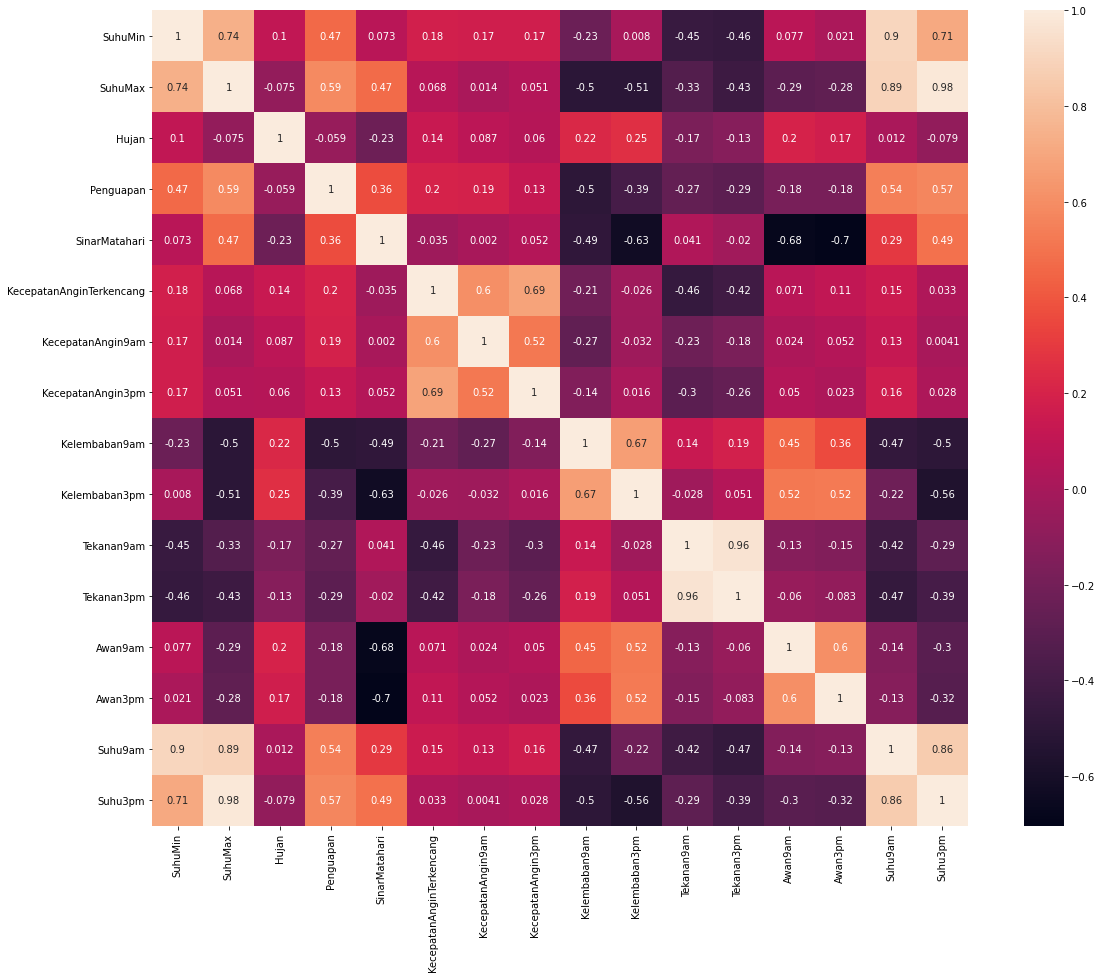

In [19]:
# MEMBUAT KORELASI MATRIKS

corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True, square=True)

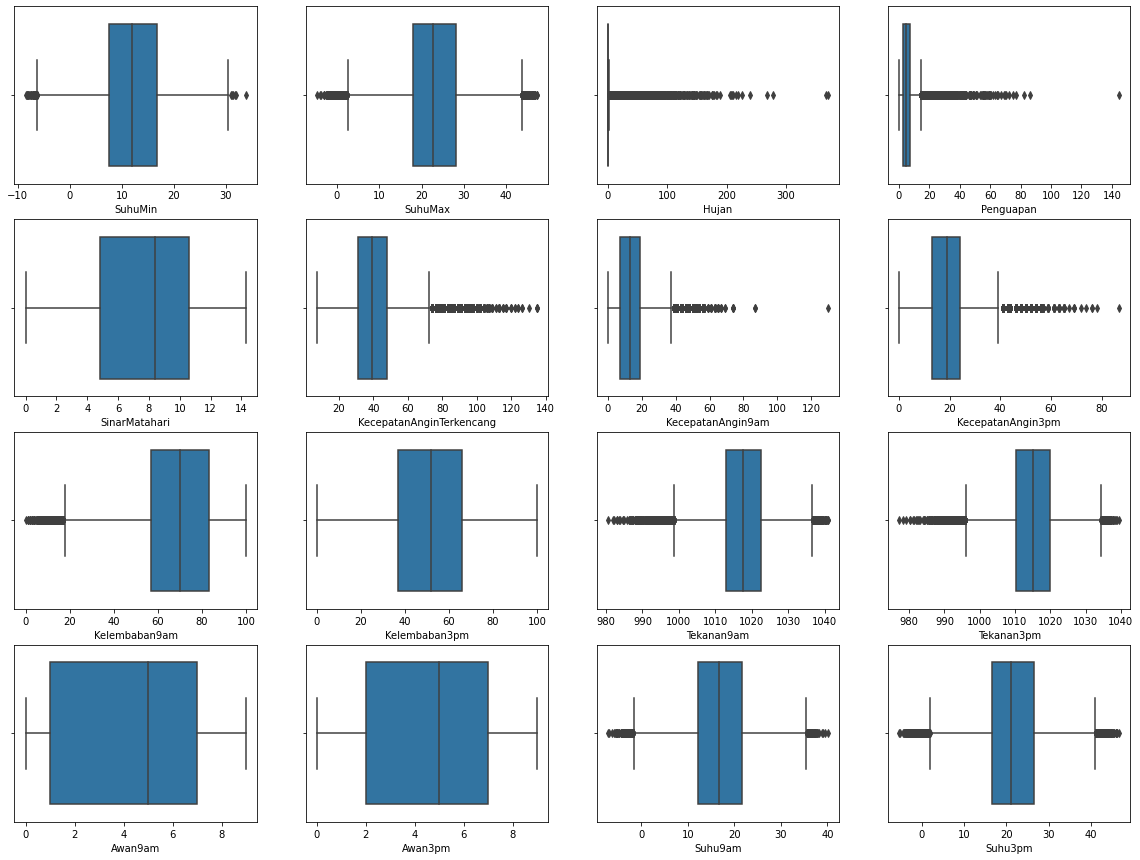

In [20]:
# MENEMUKAN OUTLIERS DENGAN BOXPLOT

train_num = train.iloc[:,[0,1,2,3,4,6,9,10,11,12,13,14,15,16,17,18]]
train_num.columns

fig, axes = plt.subplots(ncols = 4, nrows = 4, figsize=(20,15))

for i, ax in zip(train_num.columns, axes.flat):
    sns.boxplot(x=train_num[i],ax=ax)
plt.show()

C:\Users\haura\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


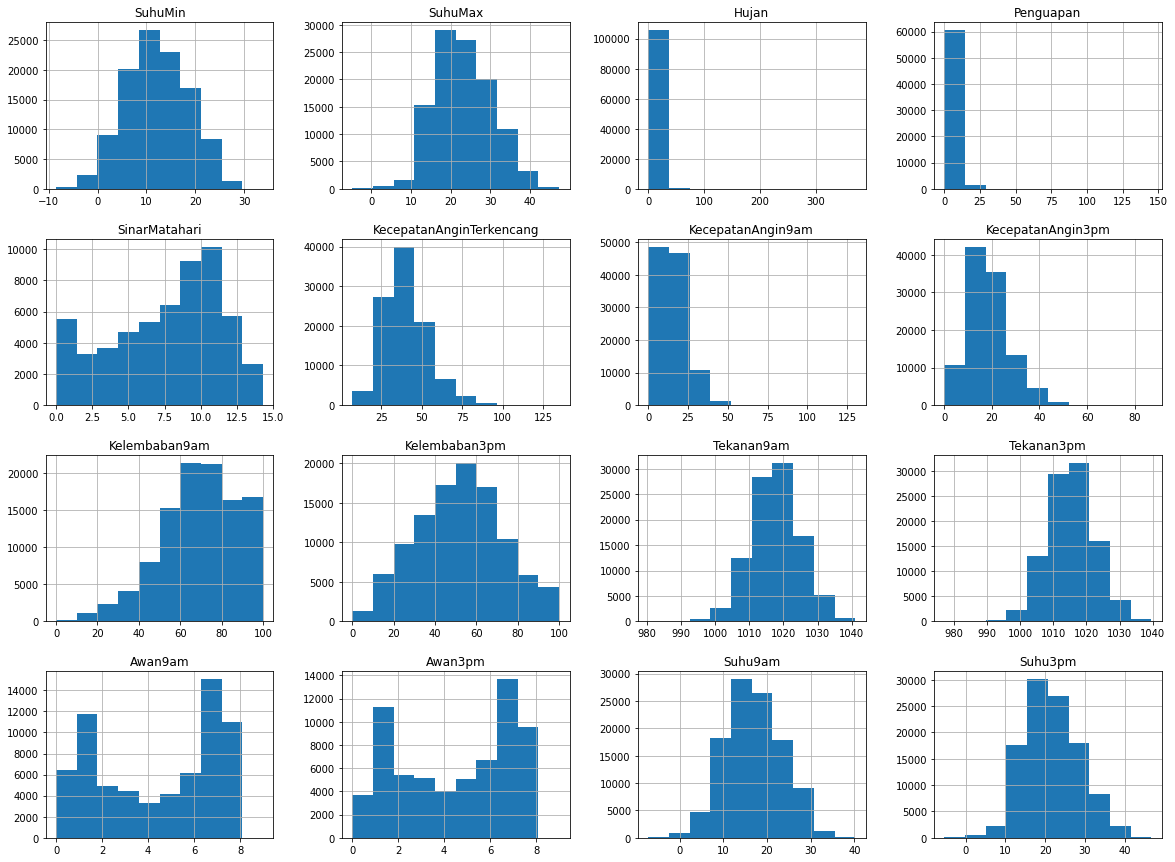

In [21]:
# MENAMPILKAN PERSEBARAN DATA

hist = train.hist(figsize=(20,15))

<AxesSubplot:xlabel='ArahAnginTerkencang', ylabel='count'>

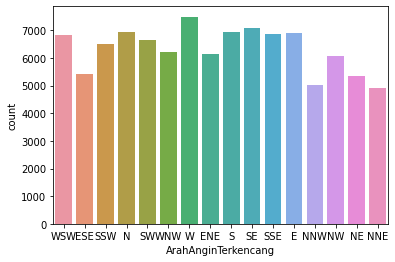

In [22]:
# VALUE COUNT UNTUK DATA CATEGORICAL (Arah Angin Terkencang)

sns.countplot(x = 'ArahAnginTerkencang', data = train)

<AxesSubplot:xlabel='ArahAngin9am', ylabel='count'>

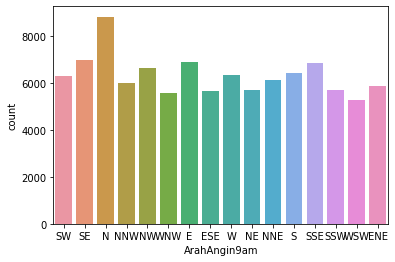

In [23]:
# VALUE COUNT UNTUK DATA CATEGORICAL (Arah Angin 9am)

sns.countplot(x = 'ArahAngin9am', data = train)

<AxesSubplot:xlabel='ArahAngin3pm', ylabel='count'>

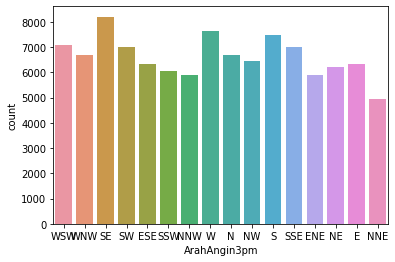

In [24]:
# VALUE COUNT UNTUK DATA CATEGORICAL (Arah Angin 3pm)

sns.countplot(x = 'ArahAngin3pm', data = train)

<AxesSubplot:xlabel='BersaljuHariIni', ylabel='count'>

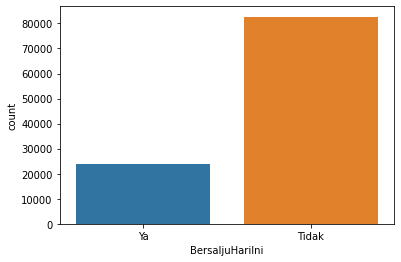

In [25]:
# VALUE COUNT UNTUK DATA CATEGORICAL (Bersalju Hari Ini)

sns.countplot(x = 'BersaljuHariIni', data = train)

<AxesSubplot:xlabel='BersaljuBesok', ylabel='count'>

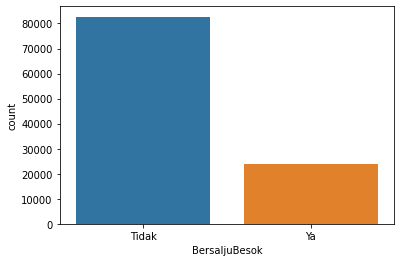

In [26]:
# VALUE COUNT UNTUK DATA CATEGORICAL (Bersalju Besok)

sns.countplot(x = 'BersaljuBesok', data = train)

In [27]:
# MENCARI MISSING VALUES

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
SinarMatahari             52379  0.480123
Penguapan                 47024  0.431037
Awan3pm                   44471  0.407636
Awan9am                   41844  0.383556
Tekanan9am                11327  0.103827
Tekanan3pm                11308  0.103653
ArahAngin9am               7923  0.072625
ArahAnginTerkencang        7744  0.070984
KecepatanAnginTerkencang   7696  0.070544
Kelembaban3pm              3374  0.030927
ArahAngin3pm               3197  0.029305
Suhu3pm                    2698  0.024731
BersaljuBesok              2431  0.022283
Hujan                      2431  0.022283
BersaljuHariIni            2431  0.022283
KecepatanAngin3pm          2303  0.021110
Kelembaban9am              2002  0.018351
KecepatanAngin9am          1353  0.012402
Suhu9am                    1340  0.012283
SuhuMin                    1122  0.010285
SuhuMax                     929  0.008516

In [28]:
# DEALING MISSING VALUES

train.fillna(train.mean(), inplace=True) # untuk data numerik
train = train.fillna(train.mode().iloc[0]) # untuk data string

train.head()

SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari ArahAnginTerkencang  \
0     10.4     15.5    4.8    5.46244       7.599527                 WSW   
1      9.0     17.0    8.0    2.60000       7.400000                   W   
2     18.2     32.0    0.0    5.46244       7.599527                 ESE   
3      7.3     24.5    0.0    8.40000      10.400000                 SSW   
4      5.9     20.3    0.0    3.60000      12.600000                   N   

   KecepatanAnginTerkencang ArahAngin9am ArahAngin3pm  KecepatanAngin9am  ...  \
0                 24.000000            N          WSW                0.0  ...   
1                 40.032002           SW          WNW               13.0  ...   
2                 44.000000           SE           SE               15.0  ...   
3                 54.000000            N           SW               13.0  ...   
4                 37.000000          NNW          ESE               22.0  ...   

   Kelembaban9am  Kelembaban3pm  Tekanan9am   Tekanan3pm   Awan9am  Awan3pm  \
0           78.0           76.0  1020.10000  1018.500000  4.450893  4.51614   
1           80.0           61.0  1015.20000  1014.600000  7.000000  5.00000   
2           62.0           42.0  1017.64708  1015.253117  4.450893  4.51614   
3           25.0           17.0  1019.20000  1016.900000  1.000000  7.00000   
4           55.0           48.0  1019.70000  1014.700000  2.000000  6.00000   

   Suhu9am  Suhu3pm  BersaljuHariIni BersaljuBesok  
0     13.1     15.0               Ya         Tidak  
1     11.9     15.5               Ya            Ya  
2     23.8     29.6            Tidak         Tidak  
3     15.3     23.2            Tidak         Tidak  
4     12.4     18.1            Tidak         Tidak  

[5 rows x 21 columns]

In [29]:
# SUDAH HANDLE MISSING VALUES

train.isnull().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [30]:
train.shape

(109095, 21)

In [31]:
# DEALING OUTLIERS

from scipy import stats

z = np.abs(stats.zscore(train[['SuhuMin', 'SuhuMax', 'Penguapan', 'Hujan', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Tekanan9am', 'Tekanan3pm', 'Suhu9am', 'Suhu3pm']]))
train = train[(z < 3).all(axis=1)]

In [32]:
train.shape

(102486, 21)

FEATURE ENGINEERING

In [33]:
# BINNING ATRIBUT 'ARAH ANGIN'

ArahAnginTerkencang = {"ArahAnginTerkencang": 
                        {'WSW' : 'W', 
                        'ESE' : 'E',
                        'SSW' : 'S',
                        'SW' : 'W',
                        'WNW' : 'W',
                        'ENE' : 'E',
                        'SE' : 'E',
                        'SSE' : 'S',
                        'NNW' : 'N',
                        'NW' : 'W',
                        'NE' : 'E',
                        'NNE' : 'N'
                        }}
ArahAngin9am = {"ArahAngin9am": 
                        {'WSW' : 'W', 
                        'ESE' : 'E',
                        'SSW' : 'S',
                        'SW' : 'W',
                        'WNW' : 'W',
                        'ENE' : 'E',
                        'SE' : 'E',
                        'SSE' : 'S',
                        'NNW' : 'N',
                        'NW' : 'W',
                        'NE' : 'E',
                        'NNE' : 'N'
                        }}
ArahAngin3pm = {"ArahAngin3pm": 
                        {'WSW' : 'W', 
                        'ESE' : 'E',
                        'SSW' : 'S',
                        'SW' : 'W',
                        'WNW' : 'W',
                        'ENE' : 'E',
                        'SE' : 'E',
                        'SSE' : 'S',
                        'NNW' : 'N',
                        'NW' : 'W',
                        'NE' : 'E',
                        'NNE' : 'N'
                        }}

train.replace(ArahAnginTerkencang, inplace=True)
train.replace(ArahAngin9am, inplace=True)
train.replace(ArahAngin3pm, inplace=True)

train

SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari ArahAnginTerkencang  \
0          10.4     15.5    4.8    5.46244       7.599527                   W   
1           9.0     17.0    8.0    2.60000       7.400000                   W   
2          18.2     32.0    0.0    5.46244       7.599527                   E   
3           7.3     24.5    0.0    8.40000      10.400000                   S   
4           5.9     20.3    0.0    3.60000      12.600000                   N   
...         ...      ...    ...        ...            ...                 ...   
109090     20.1     23.7    0.0    7.20000       8.900000                   E   
109091     15.7     25.2    0.0    5.46244       7.599527                   S   
109092      7.5     20.4    1.6    5.46244       7.599527                   W   
109093     10.8     29.8    0.0    7.80000      11.200000                   E   
109094     12.3     27.4    9.0    5.46244       7.599527                   W   

        KecepatanAnginTerkencang ArahAngin9am ArahAngin3pm  KecepatanAngin9am  \
0                      24.000000            N            W                0.0   
1                      40.032002            W            W               13.0   
2                      44.000000            E            E               15.0   
3                      54.000000            N            W               13.0   
4                      37.000000            N            E               22.0   
...                          ...          ...          ...                ...   
109090                 43.000000            E            E               24.0   
109091                 37.000000            S            E               28.0   
109092                 33.000000            N            W                4.0   
109093                 48.000000            E            E               13.0   
109094                 35.000000            N            E               11.0   

        ...  Kelembaban9am  Kelembaban3pm  Tekanan9am   Tekanan3pm   Awan9am  \
0       ...           78.0           76.0  1020.10000  1018.500000  4.450893   
1       ...           80.0           61.0  1015.20000  1014.600000  7.000000   
2       ...           62.0           42.0  1017.64708  1015.253117  4.450893   
3       ...           25.0           17.0  1019.20000  1016.900000  1.000000   
4       ...           55.0           48.0  1019.70000  1014.700000  2.000000   
...     ...            ...            ...         ...          ...       ...   
109090  ...           74.0           70.0  1019.30000  1017.600000  4.000000   
109091  ...           52.0           52.0  1018.40000  1016.200000  4.450893   
109092  ...           92.0           51.0  1014.50000  1010.600000  4.450893   
109093  ...           35.0           18.0  1020.00000  1015.800000  0.000000   
109094  ...           71.0           76.0  1010.40000  1005.400000  4.450893   

        Awan3pm  Suhu9am  Suhu3pm  BersaljuHariIni BersaljuBesok  
0       4.51614     13.1     15.0               Ya         Tidak  
1       5.00000     11.9     15.5               Ya            Ya  
2       4.51614     23.8     29.6            Tidak         Tidak  
3       7.00000     15.3     23.2            Tidak         Tidak  
4       6.00000     12.4     18.1            Tidak         Tidak  
...         ...      ...      ...              ...           ...  
109090  6.00000     22.0     22.1            Tidak            Ya  
109091  4.51614     23.8     24.4            Tidak            Ya  
109092  4.51614     12.6     19.8               Ya         Tidak  
109093  1.00000     21.7     29.2            Tidak         Tidak  
109094  4.51614     20.4     23.3               Ya         Tidak  

[102486 rows x 21 columns]

In [34]:
# ENCODE CATEGORICAL DATA

labelencoder = LabelEncoder()
train['ArahAnginTerkencang'] = labelencoder.fit_transform(train['ArahAnginTerkencang'])
labelencoder = LabelEncoder()
train['ArahAngin9am'] = labelencoder.fit_transform(train['ArahAngin9am'])
labelencoder = LabelEncoder()
train['ArahAngin3pm'] = labelencoder.fit_transform(train['ArahAngin3pm'])
labelencoder = LabelEncoder()
train['BersaljuHariIni'] = labelencoder.fit_transform(train['BersaljuHariIni'])
labelencoder = LabelEncoder()
train['BersaljuBesok'] = labelencoder.fit_transform(train['BersaljuBesok'])

train

SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari  \
0          10.4     15.5    4.8    5.46244       7.599527   
1           9.0     17.0    8.0    2.60000       7.400000   
2          18.2     32.0    0.0    5.46244       7.599527   
3           7.3     24.5    0.0    8.40000      10.400000   
4           5.9     20.3    0.0    3.60000      12.600000   
...         ...      ...    ...        ...            ...   
109090     20.1     23.7    0.0    7.20000       8.900000   
109091     15.7     25.2    0.0    5.46244       7.599527   
109092      7.5     20.4    1.6    5.46244       7.599527   
109093     10.8     29.8    0.0    7.80000      11.200000   
109094     12.3     27.4    9.0    5.46244       7.599527   

        ArahAnginTerkencang  KecepatanAnginTerkencang  ArahAngin9am  \
0                         3                 24.000000             1   
1                         3                 40.032002             3   
2                         0                 44.000000             0   
3                         2                 54.000000             1   
4                         1                 37.000000             1   
...                     ...                       ...           ...   
109090                    0                 43.000000             0   
109091                    2                 37.000000             2   
109092                    3                 33.000000             1   
109093                    0                 48.000000             0   
109094                    3                 35.000000             1   

        ArahAngin3pm  KecepatanAngin9am  ...  Kelembaban9am  Kelembaban3pm  \
0                  3                0.0  ...           78.0           76.0   
1                  3               13.0  ...           80.0           61.0   
2                  0               15.0  ...           62.0           42.0   
3                  3               13.0  ...           25.0           17.0   
4                  0               22.0  ...           55.0           48.0   
...              ...                ...  ...            ...            ...   
109090             0               24.0  ...           74.0           70.0   
109091             0               28.0  ...           52.0           52.0   
109092             3                4.0  ...           92.0           51.0   
109093             0               13.0  ...           35.0           18.0   
109094             0               11.0  ...           71.0           76.0   

        Tekanan9am   Tekanan3pm   Awan9am  Awan3pm  Suhu9am  Suhu3pm  \
0       1020.10000  1018.500000  4.450893  4.51614     13.1     15.0   
1       1015.20000  1014.600000  7.000000  5.00000     11.9     15.5   
2       1017.64708  1015.253117  4.450893  4.51614     23.8     29.6   
3       1019.20000  1016.900000  1.000000  7.00000     15.3     23.2   
4       1019.70000  1014.700000  2.000000  6.00000     12.4     18.1   
...            ...          ...       ...      ...      ...      ...   
109090  1019.30000  1017.600000  4.000000  6.00000     22.0     22.1   
109091  1018.40000  1016.200000  4.450893  4.51614     23.8     24.4   
109092  1014.50000  1010.600000  4.450893  4.51614     12.6     19.8   
109093  1020.00000  1015.800000  0.000000  1.00000     21.7     29.2   
109094  1010.40000  1005.400000  4.450893  4.51614     20.4     23.3   

        BersaljuHariIni  BersaljuBesok  
0                     1              0  
1                     1              1  
2                     0              0  
3                     0              0  
4                     0              0  
...                 ...            ...  
109090                0              1  
109091                0              1  
109092                1              0  
109093                0              0  
109094                1              0  

[102486 rows x 21 columns]

In [35]:
# SCALING

scaler = MinMaxScaler()

train.iloc[0:len(train),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]] = scaler.fit_transform(train.iloc[0:len(train),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]])

train.head()

SuhuMin   SuhuMax     Hujan  Penguapan  SinarMatahari  \
0  0.455026  0.318396  0.172662   0.366607       0.531435   
1  0.417989  0.353774  0.287770   0.174497       0.517483   
2  0.661376  0.707547  0.000000   0.366607       0.531435   
3  0.373016  0.530660  0.000000   0.563758       0.727273   
4  0.335979  0.431604  0.000000   0.241611       0.881119   

   ArahAnginTerkencang  KecepatanAnginTerkencang  ArahAngin9am  ArahAngin3pm  \
0             1.000000                  0.239437      0.333333           1.0   
1             1.000000                  0.465239      1.000000           1.0   
2             0.000000                  0.521127      0.000000           0.0   
3             0.666667                  0.661972      0.333333           1.0   
4             0.333333                  0.422535      0.333333           0.0   

   KecepatanAngin9am  ...  Kelembaban9am  Kelembaban3pm  Tekanan9am  \
0           0.000000  ...       0.747126       0.757576    0.560794   
1           0.333333  ...       0.770115       0.606061    0.439206   
2           0.384615  ...       0.563218       0.414141    0.499928   
3           0.333333  ...       0.137931       0.161616    0.538462   
4           0.564103  ...       0.482759       0.474747    0.550868   

   Tekanan3pm   Awan9am   Awan3pm   Suhu9am   Suhu3pm  BersaljuHariIni  \
0    0.581454  0.494544  0.501793  0.398964  0.337408              1.0   
1    0.483709  0.777778  0.555556  0.367876  0.349633              1.0   
2    0.500078  0.494544  0.501793  0.676166  0.694377              0.0   
3    0.541353  0.111111  0.777778  0.455959  0.537897              0.0   
4    0.486216  0.222222  0.666667  0.380829  0.413203              0.0   

   BersaljuBesok  
0            0.0  
1            1.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 21 columns]

# PREPARATION DATA TEST

<AxesSubplot:>

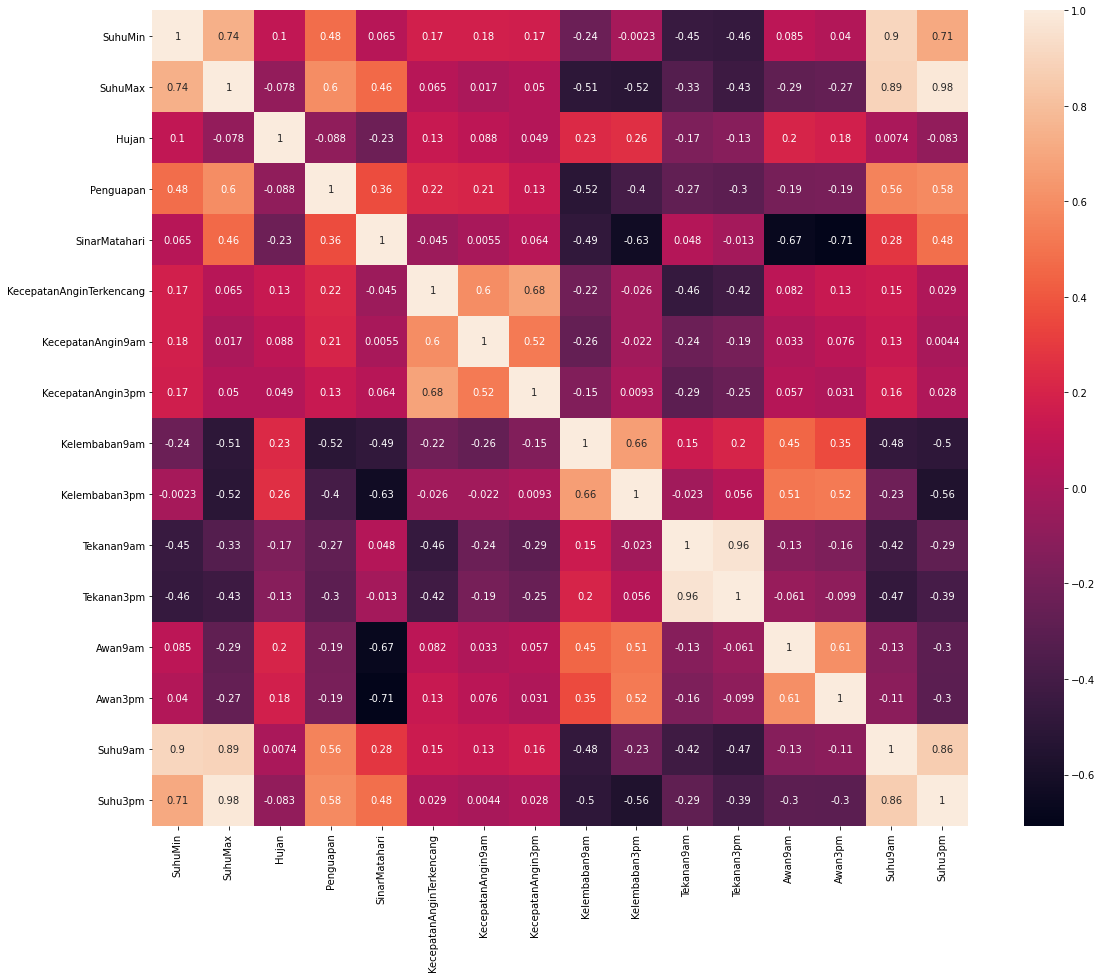

In [36]:
# MEMBUAT KORELASI MATRIKS

corrmat = test.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True, square=True)

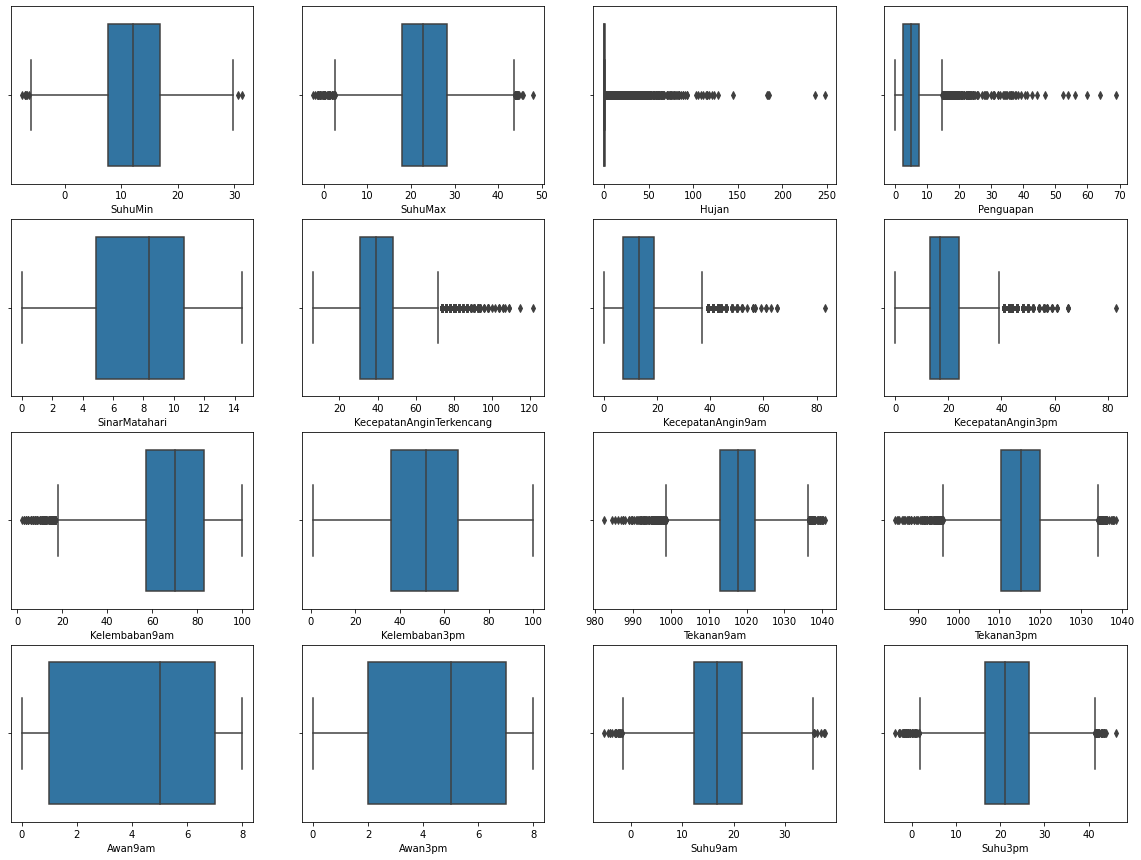

In [37]:
test_num = test.iloc[:,[0,1,2,3,4,6,9,10,11,12,13,14,15,16,17,18]]
test_num.columns

fig, axes = plt.subplots(ncols = 4, nrows = 4, figsize=(20,15))

for i, ax in zip(test_num.columns, axes.flat):
    sns.boxplot(x=test_num[i],ax=ax)
plt.show()

C:\Users\haura\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


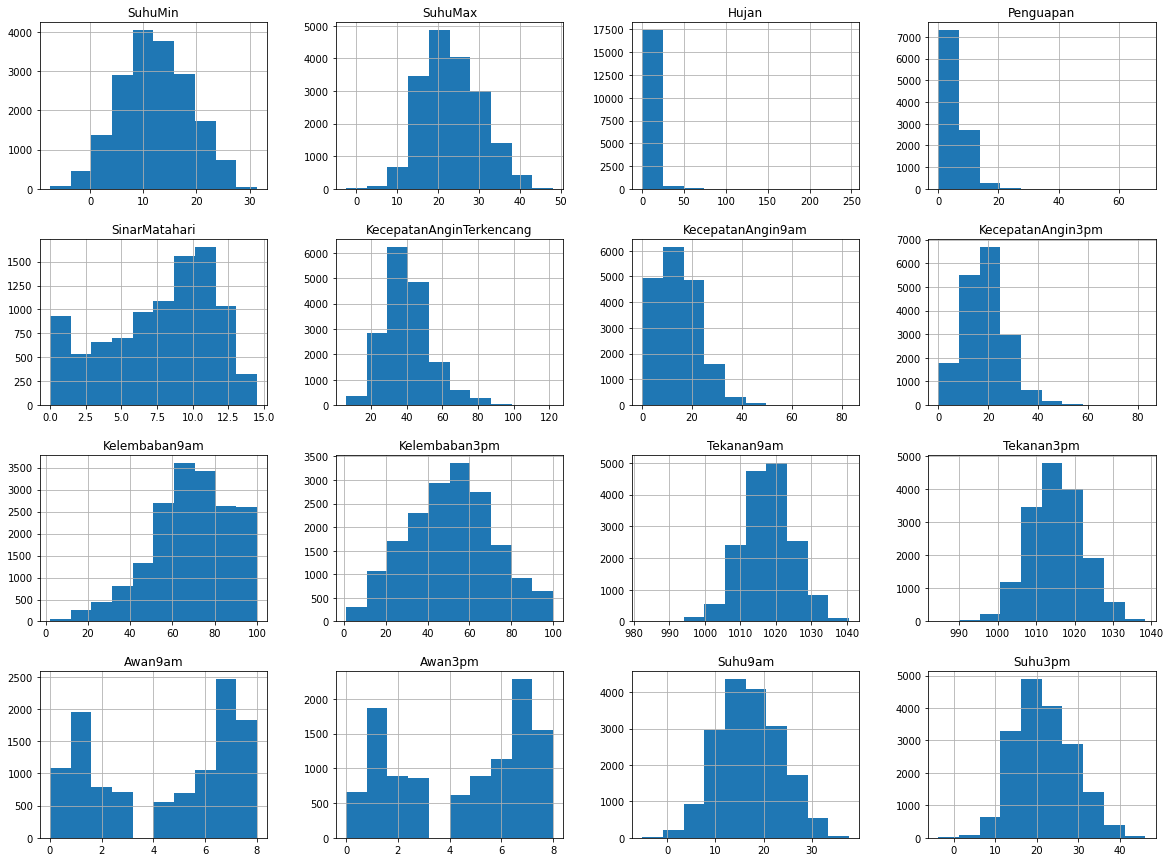

In [38]:
# MENAMPILKAN PERSEBARAN DATA

hist = test.hist(figsize=(20,15))

<AxesSubplot:xlabel='ArahAnginTerkencang', ylabel='count'>

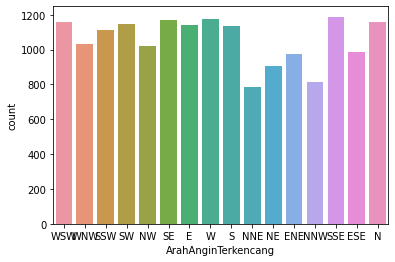

In [39]:
# VALUE COUNT UNTUK DATA CATEGORICAL (Arah Angin Terkencang)

sns.countplot(x = 'ArahAnginTerkencang', data = test)

<AxesSubplot:xlabel='ArahAngin9am', ylabel='count'>

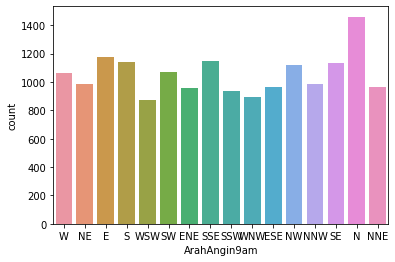

In [40]:
# VALUE COUNT UNTUK DATA CATEGORICAL (Arah Angin 9am)

sns.countplot(x = 'ArahAngin9am', data = test)

<AxesSubplot:xlabel='ArahAngin3pm', ylabel='count'>

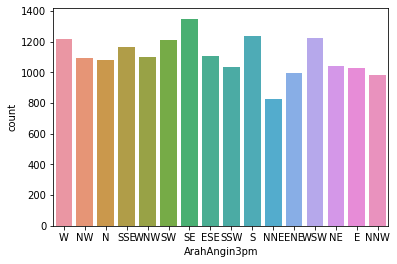

In [41]:
# VALUE COUNT UNTUK DATA CATEGORICAL (Arah Angin 3pm)

sns.countplot(x = 'ArahAngin3pm', data = test)

<AxesSubplot:xlabel='BersaljuHariIni', ylabel='count'>

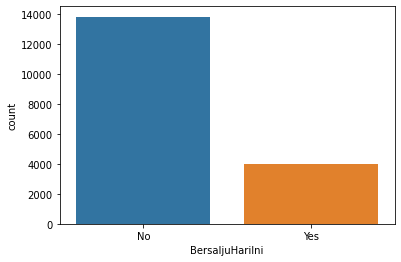

In [42]:
# VALUE COUNT UNTUK DATA CATEGORICAL (Bersalju Hari Ini)

sns.countplot(x = 'BersaljuHariIni', data = test)

<AxesSubplot:xlabel='BersaljuBesok', ylabel='count'>

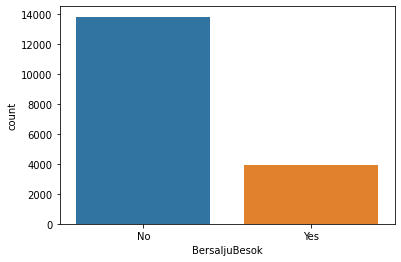

In [43]:
# VALUE COUNT UNTUK DATA CATEGORICAL (Bersalju Hari Ini)

sns.countplot(x = 'BersaljuBesok', data = test)

In [44]:
# MENCARI MISSING VALUES

total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
SinarMatahari              8718  0.479485
Penguapan                  7856  0.432076
Awan3pm                    7456  0.410076
Awan9am                    7042  0.387306
Tekanan9am                 1865  0.102574
Tekanan3pm                 1853  0.101914
ArahAngin9am               1308  0.071939
ArahAnginTerkencang        1281  0.070454
KecepatanAnginTerkencang   1274  0.070069
Kelembaban3pm               548  0.030140
ArahAngin3pm                496  0.027280
Suhu3pm                     442  0.024310
BersaljuBesok               419  0.023045
Hujan                       387  0.021285
BersaljuHariIni             387  0.021285
KecepatanAngin3pm           354  0.019470
Kelembaban9am               330  0.018150
Suhu9am                     219  0.012045
KecepatanAngin9am           198  0.010890
SuhuMax                     165  0.009075
SuhuMin                     165  0.009075

In [45]:
# DEALING MISSING VALUES

test.fillna(test.mean(), inplace=True) # untuk data numerik
test = test.fillna(test.mode().iloc[0]) # untuk data string

test.head()

SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari ArahAnginTerkencang  \
0     11.0     27.5    0.0   5.509646       6.400000                 WSW   
1     10.0     19.9    0.2   5.509646       7.630135                 WNW   
2      9.2     27.2    0.0   5.200000      10.400000                 SSW   
3     17.7     27.0    0.0   4.600000       6.700000                  SW   
4      2.3      7.9   88.0   5.509646       7.630135                  NW   

   KecepatanAnginTerkencang ArahAngin9am ArahAngin3pm  KecepatanAngin9am  ...  \
0                      46.0            W            W               20.0  ...   
1                      56.0            W           NW               24.0  ...   
2                      33.0           NE            N               13.0  ...   
3                      35.0            E          SSE               20.0  ...   
4                      46.0            W          WNW               13.0  ...   

   Kelembaban9am  Kelembaban3pm  Tekanan9am   Tekanan3pm  Awan9am   Awan3pm  \
0           39.0           56.0  1013.00000  1012.400000  4.00000  7.000000   
1           76.0           32.0  1017.00000  1015.200000  8.00000  1.000000   
2           89.0           27.0  1018.60000  1015.700000  0.00000  1.000000   
3           55.0           41.0  1010.20000  1008.600000  7.00000  6.000000   
4           98.0           95.0  1017.56166  1015.181064  4.44982  4.498322   

   Suhu9am  Suhu3pm  BersaljuHariIni BersaljuBesok  
0     25.7     23.6               No            No  
1     10.7     18.9               No           Yes  
2     13.9     26.3               No            No  
3     22.3     26.4               No            No  
4      4.4      6.0              Yes            No  

[5 rows x 21 columns]

In [46]:
# SUDAH HANDLE MISSING VALUES

test.isnull().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [47]:
test.shape

(18182, 21)

In [48]:
# DEALING OUTLIERS

from scipy import stats

z = np.abs(stats.zscore(test[['SuhuMin', 'SuhuMax', 'Penguapan', 'Hujan', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Tekanan9am', 'Tekanan3pm', 'Suhu9am', 'Suhu3pm']]))
test = test[(z < 3).all(axis=1)]

In [49]:
test.shape

(17066, 21)

FEATURE ENGINEERING

In [50]:
# BINNING ATRIBUT 'ARAH ANGIN'

ArahAnginTerkencang = {"ArahAnginTerkencang": 
                        {'WSW' : 'W', 
                        'ESE' : 'E',
                        'SSW' : 'S',
                        'SW' : 'W',
                        'WNW' : 'W',
                        'ENE' : 'E',
                        'SE' : 'E',
                        'SSE' : 'S',
                        'NNW' : 'N',
                        'NW' : 'W',
                        'NE' : 'E',
                        'NNE' : 'N'
                        }}
ArahAngin9am = {"ArahAngin9am": 
                        {'WSW' : 'W', 
                        'ESE' : 'E',
                        'SSW' : 'S',
                        'SW' : 'W',
                        'WNW' : 'W',
                        'ENE' : 'E',
                        'SE' : 'E',
                        'SSE' : 'S',
                        'NNW' : 'N',
                        'NW' : 'W',
                        'NE' : 'E',
                        'NNE' : 'N'
                        }}
ArahAngin3pm = {"ArahAngin3pm": 
                        {'WSW' : 'W', 
                        'ESE' : 'E',
                        'SSW' : 'S',
                        'SW' : 'W',
                        'WNW' : 'W',
                        'ENE' : 'E',
                        'SE' : 'E',
                        'SSE' : 'S',
                        'NNW' : 'N',
                        'NW' : 'W',
                        'NE' : 'E',
                        'NNE' : 'N'
                        }}

test.replace(ArahAnginTerkencang, inplace=True)
test.replace(ArahAngin9am, inplace=True)
test.replace(ArahAngin3pm, inplace=True)

test

SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari ArahAnginTerkencang  \
0         11.0     27.5    0.0   5.509646       6.400000                   W   
1         10.0     19.9    0.2   5.509646       7.630135                   W   
2          9.2     27.2    0.0   5.200000      10.400000                   S   
3         17.7     27.0    0.0   4.600000       6.700000                   W   
5         18.4     33.1    0.2   5.509646       7.630135                   W   
...        ...      ...    ...        ...            ...                 ...   
18177      7.8     25.8    0.0   8.000000      13.200000                   E   
18178     12.4     26.6    0.0   8.000000      11.600000                   W   
18179      6.7     22.9    0.0   5.509646       7.630135                   S   
18180     12.5     26.7    0.0   9.000000      10.800000                   E   
18181     12.3     15.9    8.2   5.509646       7.630135                   E   

       KecepatanAnginTerkencang ArahAngin9am ArahAngin3pm  KecepatanAngin9am  \
0                     46.000000            W            W               20.0   
1                     56.000000            W            W               24.0   
2                     33.000000            E            N               13.0   
3                     35.000000            E            S               20.0   
5                     39.000000            S            W                4.0   
...                         ...          ...          ...                ...   
18177                 31.000000            E            W               22.0   
18178                 37.000000            E            W               17.0   
18179                 39.974095            N            W                0.0   
18180                 35.000000            W            E                2.0   
18181                 31.000000            W            S               15.0   

       ...  Kelembaban9am  Kelembaban3pm  Tekanan9am   Tekanan3pm  Awan9am  \
0      ...           39.0           56.0  1013.00000  1012.400000  4.00000   
1      ...           76.0           32.0  1017.00000  1015.200000  8.00000   
2      ...           89.0           27.0  1018.60000  1015.700000  0.00000   
3      ...           55.0           41.0  1010.20000  1008.600000  7.00000   
5      ...           75.0           72.0  1017.56166  1015.181064  4.44982   
...    ...            ...            ...         ...          ...      ...   
18177  ...           59.0           21.0  1017.10000  1014.200000  6.00000   
18178  ...           59.0           25.0  1022.20000  1018.700000  1.00000   
18179  ...           84.0           35.0  1017.56166  1015.181064  1.00000   
18180  ...           56.0           45.0  1021.90000  1018.100000  5.00000   
18181  ...           87.0           74.0  1017.56166  1015.181064  4.44982   

        Awan3pm  Suhu9am  Suhu3pm  BersaljuHariIni BersaljuBesok  
0      7.000000     25.7     23.6               No            No  
1      1.000000     10.7     18.9               No           Yes  
2      1.000000     13.9     26.3               No            No  
3      6.000000     22.3     26.4               No            No  
5      4.498322     24.1     24.4               No            No  
...         ...      ...      ...              ...           ...  
18177  1.000000     16.8     24.0               No            No  
18178  1.000000     17.1     25.7               No            No  
18179  2.000000     11.8     22.0               No            No  
18180  5.000000     22.9     25.4               No            No  
18181  4.498322     13.8     15.4              Yes           Yes  

[17066 rows x 21 columns]

In [51]:
# ENCODE CATEGORICAL DATA

labelencoder = LabelEncoder()
test['ArahAnginTerkencang'] = labelencoder.fit_transform(test['ArahAnginTerkencang'])
labelencoder = LabelEncoder()
test['ArahAngin9am'] = labelencoder.fit_transform(test['ArahAngin9am'])
labelencoder = LabelEncoder()
test['ArahAngin3pm'] = labelencoder.fit_transform(test['ArahAngin3pm'])
labelencoder = LabelEncoder()
test['BersaljuHariIni'] = labelencoder.fit_transform(test['BersaljuHariIni'])
labelencoder = LabelEncoder()
test['BersaljuBesok'] = labelencoder.fit_transform(test['BersaljuBesok'])

test

SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari  ArahAnginTerkencang  \
0         11.0     27.5    0.0   5.509646       6.400000                    3   
1         10.0     19.9    0.2   5.509646       7.630135                    3   
2          9.2     27.2    0.0   5.200000      10.400000                    2   
3         17.7     27.0    0.0   4.600000       6.700000                    3   
5         18.4     33.1    0.2   5.509646       7.630135                    3   
...        ...      ...    ...        ...            ...                  ...   
18177      7.8     25.8    0.0   8.000000      13.200000                    0   
18178     12.4     26.6    0.0   8.000000      11.600000                    3   
18179      6.7     22.9    0.0   5.509646       7.630135                    2   
18180     12.5     26.7    0.0   9.000000      10.800000                    0   
18181     12.3     15.9    8.2   5.509646       7.630135                    0   

       KecepatanAnginTerkencang  ArahAngin9am  ArahAngin3pm  \
0                     46.000000             3             3   
1                     56.000000             3             3   
2                     33.000000             0             1   
3                     35.000000             0             2   
5                     39.000000             2             3   
...                         ...           ...           ...   
18177                 31.000000             0             3   
18178                 37.000000             0             3   
18179                 39.974095             1             3   
18180                 35.000000             3             0   
18181                 31.000000             3             2   

       KecepatanAngin9am  ...  Kelembaban9am  Kelembaban3pm  Tekanan9am  \
0                   20.0  ...           39.0           56.0  1013.00000   
1                   24.0  ...           76.0           32.0  1017.00000   
2                   13.0  ...           89.0           27.0  1018.60000   
3                   20.0  ...           55.0           41.0  1010.20000   
5                    4.0  ...           75.0           72.0  1017.56166   
...                  ...  ...            ...            ...         ...   
18177               22.0  ...           59.0           21.0  1017.10000   
18178               17.0  ...           59.0           25.0  1022.20000   
18179                0.0  ...           84.0           35.0  1017.56166   
18180                2.0  ...           56.0           45.0  1021.90000   
18181               15.0  ...           87.0           74.0  1017.56166   

        Tekanan3pm  Awan9am   Awan3pm  Suhu9am  Suhu3pm  BersaljuHariIni  \
0      1012.400000  4.00000  7.000000     25.7     23.6                0   
1      1015.200000  8.00000  1.000000     10.7     18.9                0   
2      1015.700000  0.00000  1.000000     13.9     26.3                0   
3      1008.600000  7.00000  6.000000     22.3     26.4                0   
5      1015.181064  4.44982  4.498322     24.1     24.4                0   
...            ...      ...       ...      ...      ...              ...   
18177  1014.200000  6.00000  1.000000     16.8     24.0                0   
18178  1018.700000  1.00000  1.000000     17.1     25.7                0   
18179  1015.181064  1.00000  2.000000     11.8     22.0                0   
18180  1018.100000  5.00000  5.000000     22.9     25.4                0   
18181  1015.181064  4.44982  4.498322     13.8     15.4                1   

       BersaljuBesok  
0                  0  
1                  1  
2                  0  
3                  0  
5                  0  
...              ...  
18177              0  
18178              0  
18179              0  
18180              0  
18181              1  

[17066 rows x 21 columns]

In [52]:
# SCALING

scaler = MinMaxScaler()

test.iloc[0:len(test),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]] = scaler.fit_transform(test.iloc[0:len(test),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]])

test.head()

SuhuMin   SuhuMax     Hujan  Penguapan  SinarMatahari  \
0  0.467363  0.599045  0.000000   0.372273       0.441379   
1  0.441253  0.417661  0.007407   0.372273       0.526216   
2  0.420366  0.591885  0.000000   0.351351       0.717241   
3  0.642298  0.587112  0.000000   0.310811       0.462069   
5  0.660574  0.732697  0.007407   0.372273       0.526216   

   ArahAnginTerkencang  KecepatanAnginTerkencang  ArahAngin9am  ArahAngin3pm  \
0             1.000000                  0.555556      1.000000      1.000000   
1             1.000000                  0.694444      1.000000      1.000000   
2             0.666667                  0.375000      0.000000      0.333333   
3             1.000000                  0.402778      0.000000      0.666667   
5             1.000000                  0.458333      0.666667      1.000000   

   KecepatanAngin9am  ...  Kelembaban9am  Kelembaban3pm  Tekanan9am  \
0           0.512821  ...       0.306818       0.555556    0.387654   
1           0.615385  ...       0.727273       0.313131    0.486420   
2           0.333333  ...       0.875000       0.262626    0.525926   
3           0.512821  ...       0.488636       0.404040    0.318519   
5           0.102564  ...       0.715909       0.717172    0.500288   

   Tekanan3pm   Awan9am  Awan3pm   Suhu9am   Suhu3pm  BersaljuHariIni  \
0    0.431078  0.500000  0.87500  0.737533  0.546117              0.0   
1    0.501253  1.000000  0.12500  0.343832  0.432039              0.0   
2    0.513784  0.000000  0.12500  0.427822  0.611650              0.0   
3    0.335840  0.875000  0.75000  0.648294  0.614078              0.0   
5    0.500779  0.556228  0.56229  0.695538  0.565534              0.0   

   BersaljuBesok  
0            0.0  
1            1.0  
2            0.0  
3            0.0  
5            0.0  

[5 rows x 21 columns]

# CLASSIFICATION

In [53]:
# FEATURE SELECTION

X_train = train.drop(columns = ['SuhuMin', 'SuhuMax','Hujan', 'Penguapan', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'ArahAngin9am', 'Kelembaban9am', 'Awan9am', 'Tekanan9am', 'Suhu9am', 'BersaljuBesok'])
y_train = train['BersaljuBesok']
X_test = test.drop(columns = ['SuhuMin', 'SuhuMax','Hujan', 'Penguapan', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'ArahAngin9am', 'Kelembaban9am', 'Awan9am', 'Tekanan9am', 'Suhu9am', 'BersaljuBesok'])
y_test = test['BersaljuBesok']

In [54]:
X_train.head()

SinarMatahari  ArahAnginTerkencang  KecepatanAnginTerkencang  ArahAngin3pm  \
0       0.531435             1.000000                  0.239437           1.0   
1       0.517483             1.000000                  0.465239           1.0   
2       0.531435             0.000000                  0.521127           0.0   
3       0.727273             0.666667                  0.661972           1.0   
4       0.881119             0.333333                  0.422535           0.0   

   Kelembaban3pm  Tekanan3pm   Awan3pm   Suhu3pm  BersaljuHariIni  
0       0.757576    0.581454  0.501793  0.337408              1.0  
1       0.606061    0.483709  0.555556  0.349633              1.0  
2       0.414141    0.500078  0.501793  0.694377              0.0  
3       0.161616    0.541353  0.777778  0.537897              0.0  
4       0.474747    0.486216  0.666667  0.413203              0.0

In [55]:
# MENGGUNAKAN KNEIGHBORS CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [56]:
print("Accuracy Dengan KNeighbors Classifier: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Dengan KNeighbors Classifier:  0.8410289464432205


In [57]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12980   631]
 [ 2082  1373]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     13611
         1.0       0.69      0.40      0.50      3455

    accuracy                           0.84     17066
   macro avg       0.77      0.68      0.70     17066
weighted avg       0.83      0.84      0.82     17066



In [58]:
# MENGGUNAKAN DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [59]:
print("Accuracy Dengan Decision Tree Classifier: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Dengan Decision Tree Classifier:  0.7659674206023673


In [60]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11327  2284]
 [ 1710  1745]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85     13611
         1.0       0.43      0.51      0.47      3455

    accuracy                           0.77     17066
   macro avg       0.65      0.67      0.66     17066
weighted avg       0.78      0.77      0.77     17066



In [61]:
# MENGGUNAKAN NAIVE-BAYES CLASSIFIER

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [62]:
print("Accuracy Dengan Naive-Bayes Classifier: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Dengan Naive-Bayes Classifier:  0.8023555607640923


In [63]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11558  2053]
 [ 1320  2135]]
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87     13611
         1.0       0.51      0.62      0.56      3455

    accuracy                           0.80     17066
   macro avg       0.70      0.73      0.72     17066
weighted avg       0.82      0.80      0.81     17066



In [64]:
# MENGGUNAKAN RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

In [65]:
print("Accuracy Dengan Random Forest Classifier: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Dengan Random Forest Classifier:  0.8529239423414977


In [66]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12937   674]
 [ 1836  1619]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     13611
         1.0       0.71      0.47      0.56      3455

    accuracy                           0.85     17066
   macro avg       0.79      0.71      0.74     17066
weighted avg       0.84      0.85      0.84     17066



In [67]:
X_train.to_csv(r'C:\Users\haura\OneDrive\Documents\SEMESTER 6\Pembelajaran Mesin (MaLing)\Tubes\1301183454_1301180254_Haura Athaya Salka_Tri Ayu Syifaur Rohmah/X_train.csv', sep=',',index=False, encoding='utf-8')

# Save X_test
X_test.to_csv(r'C:\Users\haura\OneDrive\Documents\SEMESTER 6\Pembelajaran Mesin (MaLing)\Tubes\1301183454_1301180254_Haura Athaya Salka_Tri Ayu Syifaur Rohmah/X_test.csv', sep=',',index=False, encoding='utf-8')

# Save y_train
y_train.to_csv(r'C:\Users\haura\OneDrive\Documents\SEMESTER 6\Pembelajaran Mesin (MaLing)\Tubes\1301183454_1301180254_Haura Athaya Salka_Tri Ayu Syifaur Rohmah/y_train.csv', sep=',',index=False, encoding='utf-8')

# Save y_test
y_test.to_csv(r'C:\Users\haura\OneDrive\Documents\SEMESTER 6\Pembelajaran Mesin (MaLing)\Tubes\1301183454_1301180254_Haura Athaya Salka_Tri Ayu Syifaur Rohmah/y_test.csv', sep=',',index=False, encoding='utf-8')